In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/shanghai_ranking_2024.csv")
df.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [5]:
df.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,11
PUB,0
PCP,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,0
PUB,0
PCP,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    989 non-null    object 
 1   University_Name         989 non-null    object 
 2   National/Regional Rank  989 non-null    object 
 3   Alumni                  989 non-null    float64
 4   Award                   989 non-null    float64
 5   Hici                    989 non-null    float64
 6   N&S                     989 non-null    float64
 7   PUB                     989 non-null    float64
 8   PCP                     989 non-null    float64
dtypes: float64(6), object(3)
memory usage: 77.3+ KB


In [13]:
df.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,4.537513,3.765420,10.817189,10.575126,35.242973,19.682609
std,10.133848,11.478268,10.971540,10.637247,13.683436,8.815979
min,0.000000,0.000000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.000000,0.000000,3.900000,25.800000,14.200000
50%,0.000000,0.000000,9.200000,7.300000,31.800000,17.600000
75%,0.000000,0.000000,14.600000,13.300000,41.500000,23.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [22]:
df.columns

Index(['University_Name', 'National/Regional Rank', 'Alumni', 'Award', 'Hici',
       'N&S', 'PUB', 'PCP'],
      dtype='object')

In [23]:
df.shape

(989, 8)

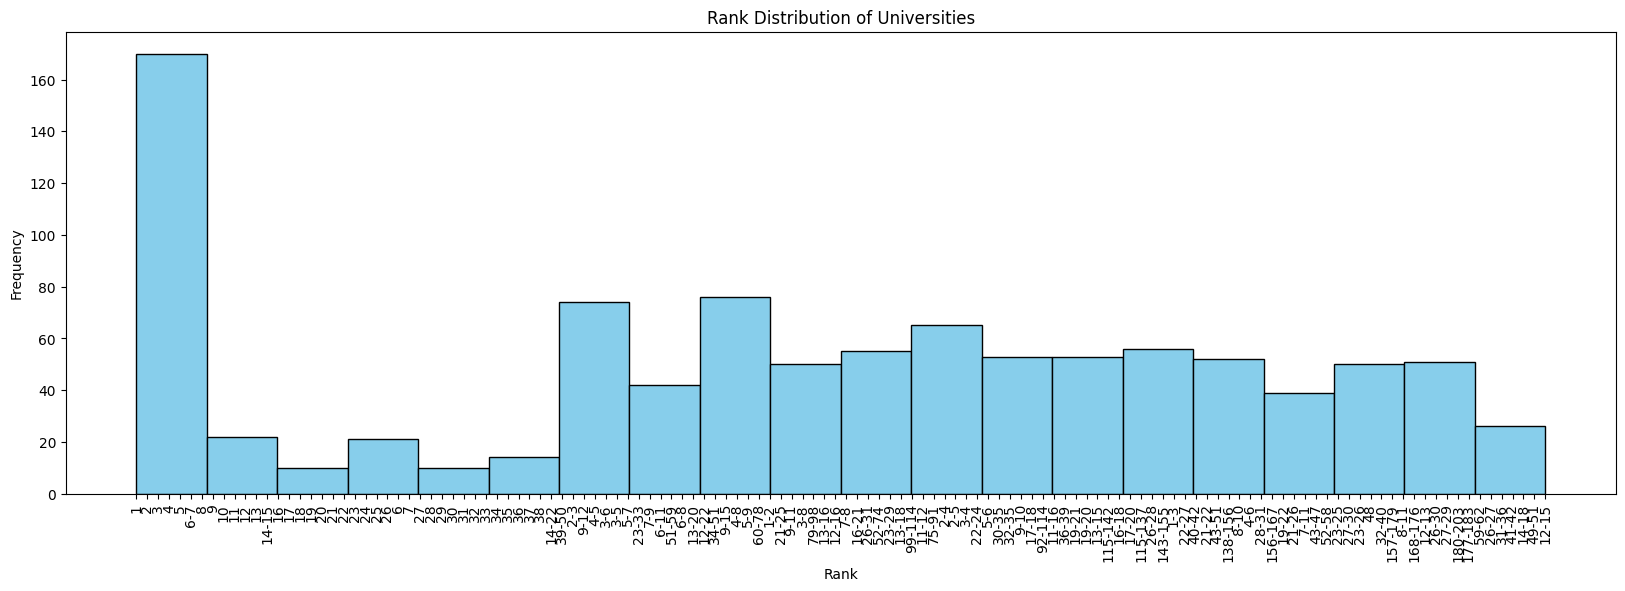

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.hist(df['National/Regional Rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Rank Distribution of Universities')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Alumni vs Award Scores

In [26]:
import plotly.express as px

fig = px.scatter(df, x='Alumni', y='Award', color='University_Name',
                 title='Alumni vs Award Scores for Top Universities')
fig.show()

Comparing National/Regional Rank with Global Rank

In [28]:
fig = px.scatter(df, x='National/Regional Rank', y='National/Regional Rank', color='National/Regional Rank',
                 title='National/Regional Rank vs Global Rank',
                 labels={'National/Regional Rank': 'Global Rank', 'National/Regional Rank': 'National/Regional Rank'},
                 hover_name='University_Name', size='Hici')
fig.update_layout(xaxis_title='Global Rank', yaxis_title='National/Regional Rank')
fig.show()

Distribution of Highly Cited Researchers (Hici)

In [29]:
fig = px.histogram(df, x='Hici', nbins=15, title='Distribution of Highly Cited Researchers (Hici)',
                   labels={'Hici': 'Highly Cited Researchers (Hici)'}, color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Hici Score', yaxis_title='Frequency')
fig.show()

Alumni Scores Across Universities

In [30]:
fig = px.bar(df, x='University_Name', y='Alumni', title='Alumni Scores Across Universities',
             labels={'Alumni': 'Alumni Score', 'University_Name': 'University'},
             color='Alumni', hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Alumni Score', xaxis_tickangle=-90, width=5000, height=1000)
fig.show()

PCP Score Distribution by Rank

In [32]:
fig = px.violin(df, y='PCP', color='National/Regional Rank', box=True, points='all',
                title='Distribution of Per Capita Performance (PCP) by Rank',
                labels={'PCP': 'Per Capita Performance', 'Rank': 'Rank'})
fig.update_layout(yaxis_title='PCP Score')
fig.show()

Top 10 Universities by Alumni Score

In [33]:
top_10_alumni = df.nlargest(10, 'Alumni')

fig = px.bar(top_10_alumni, x='University_Name', y='Alumni', color='Alumni',
             title='Top 10 Universities by Alumni Score',
             labels={'Alumni': 'Alumni Score', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Alumni Score', xaxis_tickangle=-45, height=700)
fig.show()

Award Scores for Top 10 Universities

In [34]:
top_10_award = df.nlargest(10, 'Award')

fig = px.bar(top_10_award, x='University_Name', y='Award', color='Award',
             title='Top 10 Universities by Award Score',
             labels={'Award': 'Award Score', 'University_Name': 'University'},
             hover_name='University_Name')
fig.update_layout(xaxis_title='University', yaxis_title='Award Score', xaxis_tickangle=-45, height=700)
fig.show()

In [14]:
df.drop('Rank', axis=1, inplace=True)

In [16]:
df.University_Name.nunique()

989

In [17]:
df.University_Name.unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology (MIT)',
       'University of Cambridge', 'University of California, Berkeley',
       'University of Oxford', 'Princeton University',
       'California Institute of Technology', 'Columbia University',
       'University of Chicago', 'Yale University',
       'Paris-Saclay University', 'Cornell University',
       'University of Pennsylvania',
       'University of California, Los Angeles',
       'University College London', 'Johns Hopkins University',
       'University of Washington', 'University of California, San Diego',
       'University of California, San Francisco', 'ETH Zurich',
       'Tsinghua University', 'Washington University in St. Louis',
       'Peking University', 'Imperial College London',
       'University of Toronto', 'Zhejiang University',
       'The University of Tokyo', 'Rockefeller University',
       'University of Michigan-Ann Arbor', 'New York University',
 

In [18]:
df.groupby(['University_Name'])['National/Regional Rank'].value_counts()

,,count
University_Name,National/Regional Rank,
AGH University of Krakow,4-8,1
AUT University,5-7,1
Aalborg University,5,1
Aalto University,2-4,1
Aarhus University,2,1
...,...,...
Zhejiang Normal University,138-156,1
Zhejiang Sci-Tech University,92-114,1
Zhejiang University,3,1


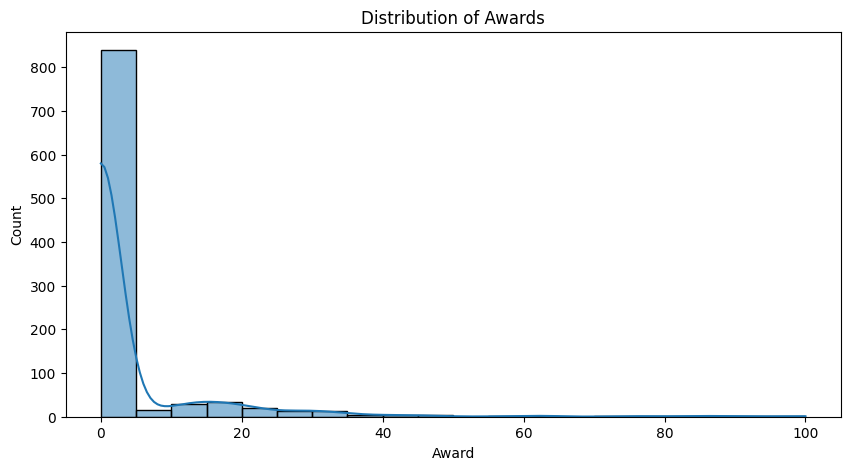

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Award'], kde=True, bins=20)
plt.title('Distribution of Awards')
plt.show()

In [21]:
df.groupby(by="University_Name").mean(numeric_only=True).style.background_gradient(cmap='Blues')

,Alumni,Award,Hici,N&S,PUB,PCP
University_Name,,,,,,
AGH University of Krakow,0.000000,0.000000,0.000000,2.000000,28.000000,11.600000
AUT University,0.000000,0.000000,6.500000,2.000000,21.200000,15.100000
Aalborg University,0.000000,0.000000,13.000000,5.000000,37.500000,17.000000
Aalto University,0.000000,0.000000,6.500000,12.400000,31.700000,14.700000
Aarhus University,10.400000,20.300000,15.900000,24.400000,55.700000,28.200000
Abdul Wali Khan University Mardan,0.000000,0.000000,6.500000,3.800000,20.900000,9.400000
Adam Mickiewicz University,0.000000,0.000000,0.000000,5.700000,25.100000,9.200000
Addis Ababa University,16.400000,0.000000,0.000000,6.100000,25.300000,12.100000
Ain Shams University,0.000000,0.000000,0.000000,5.100000,33.500000,14.400000
